In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('heart_disease_data.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
data.shape

(303, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

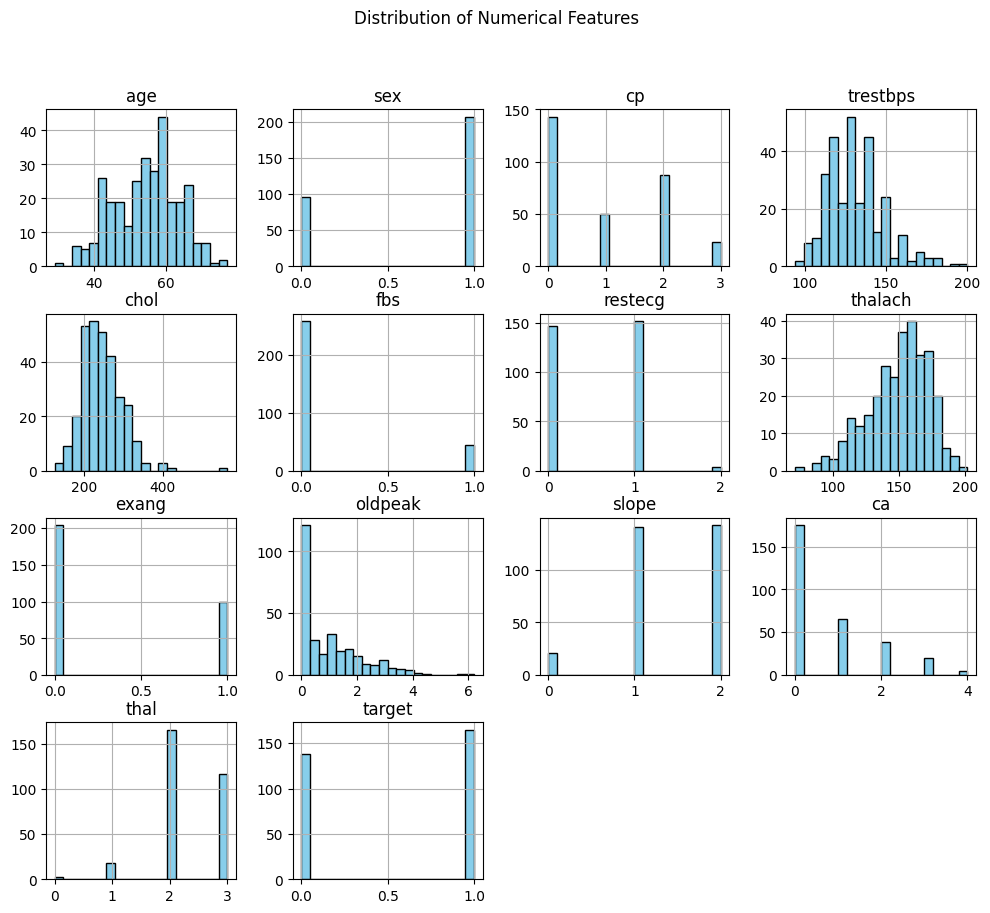

In [10]:
data.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

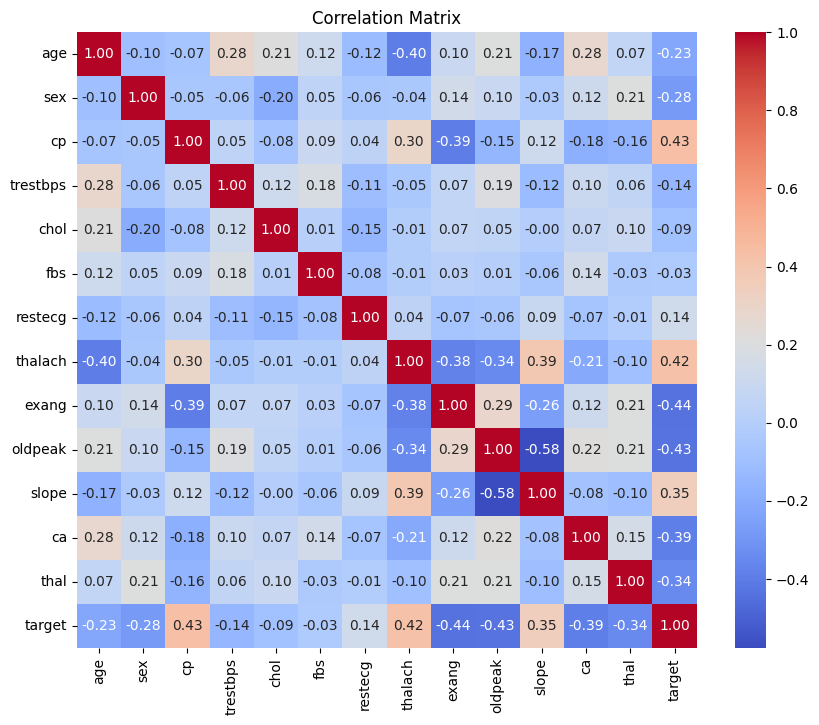

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

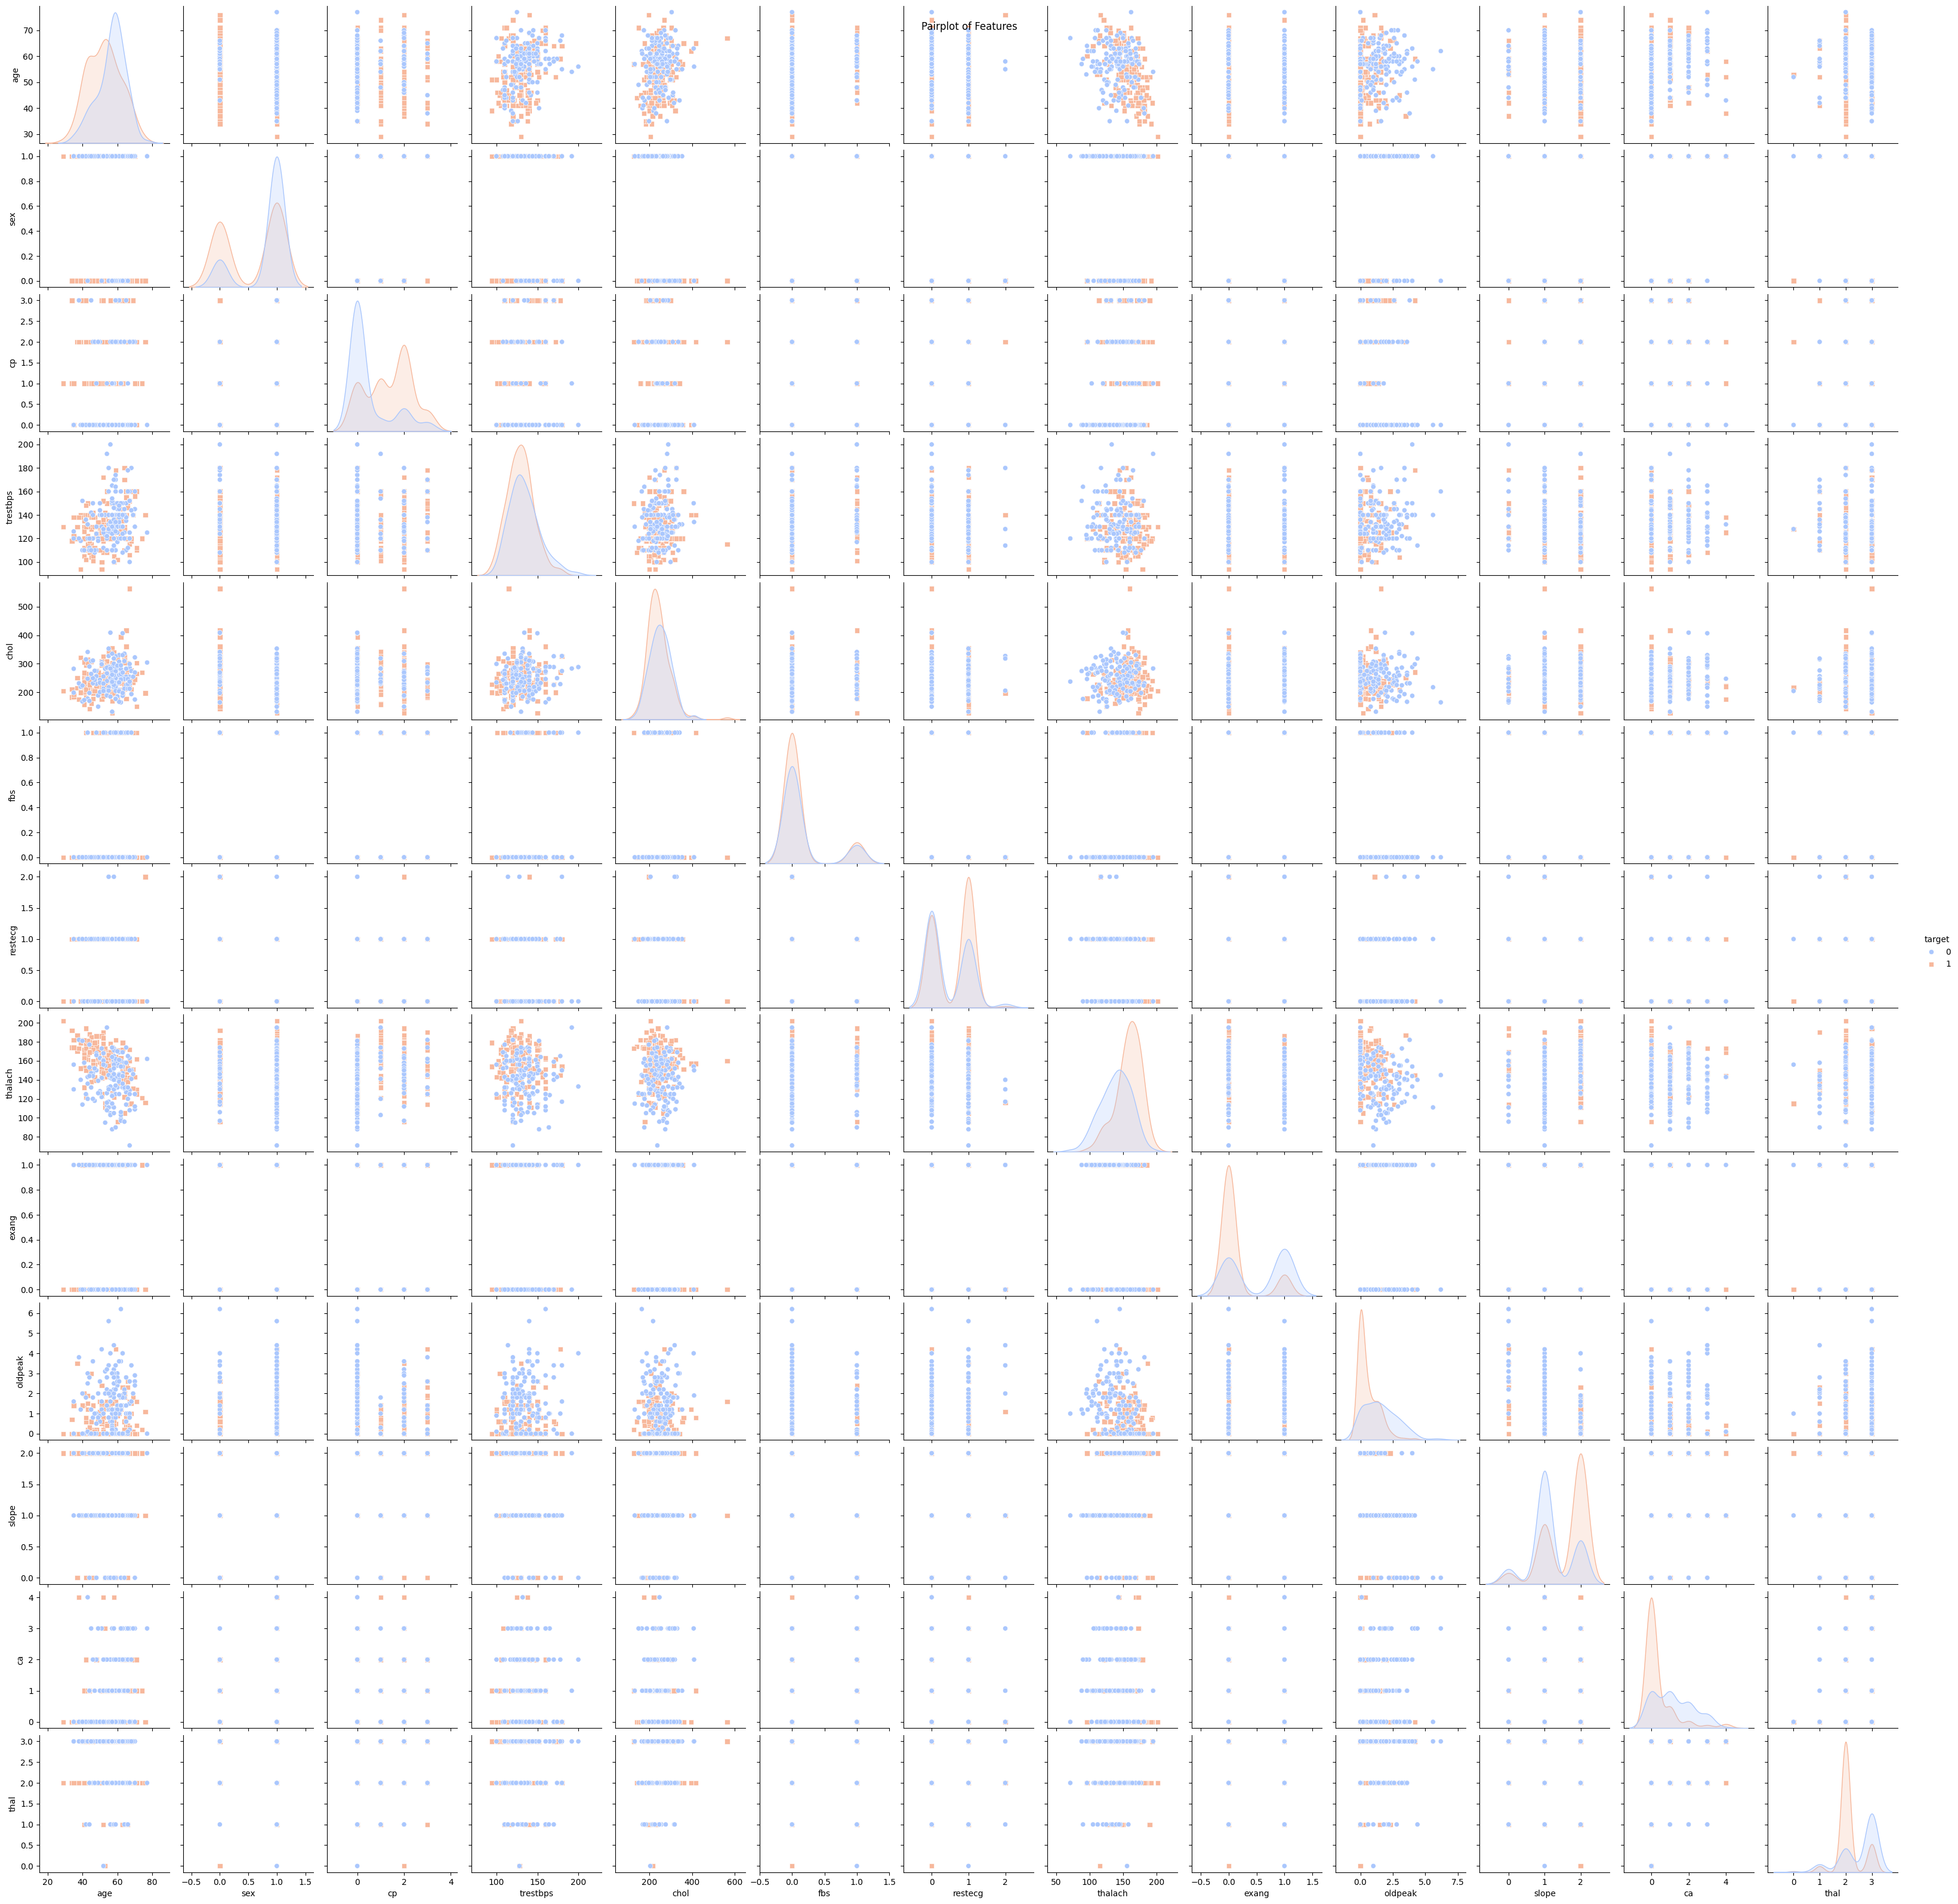

In [12]:
sns.pairplot(data, hue='target', palette='coolwarm', markers=['o', 's'])
plt.suptitle('Pairplot of Features')
plt.show()

In [13]:
X = data.drop('target', axis=1)
y = data['target']

In [14]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [15]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
models = {
    'Logistic Regression': GridSearchCV(LogisticRegression(max_iter=1000), {'C': [0.1, 1, 10, 100]}, cv=5),
    'Decision Tree': GridSearchCV(DecisionTreeClassifier(), {'max_depth': [None, 10, 20, 30]}, cv=5),
    'Random Forest': GridSearchCV(RandomForestClassifier(), {'n_estimators': [10, 50, 100]}, cv=5),
    'KNN': GridSearchCV(KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9]}, cv=5),
    'Naive Bayes': GaussianNB(),
    'SVM': GridSearchCV(SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}, cv=5)
}

In [18]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [19]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"{name} ROC AUC Score: {roc_auc_score(y_test, y_pred):.3f}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"{name} Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"{name} Cross-Validation Score: {cross_val_score(model, X_train, y_train, cv=kfold).mean():.3f}")
    print(f"{name} Best Parameters: {model.best_params_ if hasattr(model, 'best_params_') else 'N/A'}")
    print("-" * 50)


C:\Users\neelp\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\neelp\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Logistic Regression Test Accuracy: 0.852
Logistic Regression ROC AUC Score: 0.853
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Logistic Regression Confusion Matrix:
[[25  4]
 [ 5 27]]


C:\Users\neelp\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\neelp\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Logistic Regression Cross-Validation Score: 0.810
Logistic Regression Best Parameters: {'C': 10}
--------------------------------------------------
Decision Tree Test Accuracy: 0.787
Decision Tree ROC AUC Score: 0.792
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        29
           1       0.88      0.69      0.77        32

    accuracy                           0.79        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61

Decision Tree Confusion Matrix:
[[26  3]
 [10 22]]
Decision Tree Cross-Validation Score: 0.740
Decision Tree Best Parameters: {'max_depth': 10}
--------------------------------------------------
Random Forest Test Accuracy: 0.852
Random Forest ROC AUC Score: 0.851
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
       

In [20]:
ensemble_estimators = [(name, model.best_estimator_ if hasattr(model, 'best_estimator_') else model) for name, model in models.items()]
ensemble_model = VotingClassifier(estimators=ensemble_estimators)

In [21]:
ensemble_model.fit(X_train, y_train)

C:\Users\neelp\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=10, max_iter=1000)),
                             ('Decision Tree',
                              DecisionTreeClassifier(max_depth=10)),
                             ('Random Forest', RandomForestClassifier()),
                             ('KNN', KNeighborsClassifier(n_neighbors=3)),
                             ('Naive Bayes', GaussianNB()),
                             ('SVM', SVC(C=1, kernel='linear'))])

In [22]:
y_pred = ensemble_model.predict(X_test)

In [23]:
print(f"Ensemble Model Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Ensemble Model Test Accuracy: 0.869


In [24]:
print(f"Ensemble Model ROC AUC Score: {roc_auc_score(y_test, y_pred):.3f}")

Ensemble Model ROC AUC Score: 0.869


In [25]:
print(f"Ensemble Model Classification Report:\n{classification_report(y_test, y_pred)}")

Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [26]:
print(f"Ensemble Model Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Ensemble Model Confusion Matrix:
[[25  4]
 [ 4 28]]


In [27]:
print(f"Ensemble Model Cross-Validation Score: {cross_val_score(ensemble_model, X_train, y_train, cv=kfold).mean():.3f}")
print("-" * 50)

C:\Users\neelp\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble Model Cross-Validation Score: 0.802
--------------------------------------------------


In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{name} (Scaled) Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"{name} (Scaled) ROC AUC Score: {roc_auc_score(y_test, y_pred):.3f}")
    print(f"{name} (Scaled) Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"{name} (Scaled) Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"{name} (Scaled) Cross-Validation Score: {cross_val_score(model, X_train_scaled, y_train, cv=kfold).mean():.3f}")
    print(f"{name} (Scaled) Best Parameters: {model.best_params_ if hasattr(model, 'best_params_') else 'N/A'}")
    print("-" * 50)

Logistic Regression (Scaled) Test Accuracy: 0.852
Logistic Regression (Scaled) ROC AUC Score: 0.853
Logistic Regression (Scaled) Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Logistic Regression (Scaled) Confusion Matrix:
[[25  4]
 [ 5 27]]
Logistic Regression (Scaled) Cross-Validation Score: 0.806
Logistic Regression (Scaled) Best Parameters: {'C': 1}
--------------------------------------------------
Decision Tree (Scaled) Test Accuracy: 0.787
Decision Tree (Scaled) ROC AUC Score: 0.792
Decision Tree (Scaled) Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        29
           1       0.88      0.69      0.77    

In [30]:
ensemble_model.fit(X_train_scaled, y_train)
y_pred = ensemble_model.predict(X_test_scaled)
print(f"Ensemble Model (Scaled) Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Ensemble Model (Scaled) ROC AUC Score: {roc_auc_score(y_test, y_pred):.3f}")
print(f"Ensemble Model (Scaled) Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Ensemble Model (Scaled) Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Ensemble Model (Scaled) Cross-Validation Score: {cross_val_score(ensemble_model, X_train_scaled, y_train, cv=kfold).mean():.3f}")
print("-" * 50)

Ensemble Model (Scaled) Test Accuracy: 0.869
Ensemble Model (Scaled) ROC AUC Score: 0.870
Ensemble Model (Scaled) Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Ensemble Model (Scaled) Confusion Matrix:
[[26  3]
 [ 5 27]]
Ensemble Model (Scaled) Cross-Validation Score: 0.810
--------------------------------------------------
